In [150]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, zero_one_loss
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

import UFI

In [151]:
columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Country','Above/Below 50K']

data = pd.read_csv("adult.data", names = columns, sep = ",\s+")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [152]:
data.shape

(32561, 15)

In [153]:
data = data.replace("?", np.nan)
data = data.dropna()

In [154]:
data.shape

(30162, 15)

In [155]:
data

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [157]:
data_US = data[data["Country"] == "United-States"]
del data_US["Country"]

In [158]:
data_US.shape

(27504, 14)

In [159]:
data_US["Above/Below 50K"][data_US["Above/Below 50K"] == "<=50K"] = 0
data_US["Above/Below 50K"][data_US["Above/Below 50K"] == ">50K"] = 1

data_US["Above/Below 50K"] = data_US["Above/Below 50K"].astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [160]:
data_US["Sex"][data_US["Sex"] == "Male"] = 0
data_US["Sex"][data_US["Sex"] == "Female"] = 1

data_US["Sex"] = data_US["Sex"].astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [161]:
data_US = shuffle(data_US)
data_US = data_US[:5000]

In [163]:
data_US

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Above/Below 50K
28861,19,Private,283945,10th,6,Never-married,Handlers-cleaners,Other-relative,White,0,0,1602,45,0
8026,42,Private,37937,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,55,1
32082,49,Private,23776,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,0,0,0,40,0
609,17,Private,169658,10th,6,Never-married,Other-service,Own-child,White,1,0,0,21,0
10499,56,Self-emp-not-inc,162130,5th-6th,3,Married-civ-spouse,Exec-managerial,Husband,White,0,0,1887,67,1
32024,53,Private,36327,HS-grad,9,Married-civ-spouse,Sales,Husband,White,0,0,0,40,1
30166,21,Private,195199,HS-grad,9,Never-married,Prof-specialty,Own-child,White,1,0,0,30,0
3996,54,State-gov,198186,HS-grad,9,Never-married,Other-service,Not-in-family,Black,1,0,0,38,0
8549,29,Private,253814,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,1,0,0,45,0
8178,29,Private,185019,12th,8,Never-married,Other-service,Not-in-family,Other,0,0,0,40,0


In [164]:
data_US_dummy = pd.get_dummies(data_US)

In [165]:
imp_name = ["Age", "fnlgwt", "Education Num", "Sex", "Capital Gain", "Capital Loss", "Hours/Week", "Workclass", "Education", "Marital Status", "Occupation", "Relationship", "Race", "random"]
imp_name

['Age',
 'fnlgwt',
 'Education Num',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours/Week',
 'Workclass',
 'Education',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'random']

In [166]:
y = data_US_dummy["Above/Below 50K"].values

X = data_US_dummy.loc[:, data_US_dummy.columns != "Above/Below 50K"]

X["random"] = np.random.randn(X.shape[0])

In [167]:
All = []

for rep in range(100):
    
    cls = RandomForestClassifier(n_estimators = 20)
    cls.fit(X, y)
    
    imp = cls.feature_importances_
    
    imp_combined = [0] * (len(imp_name))
    
    imp_combined[:7] = imp[0:7]
    imp_combined[7]  = sum(imp[7:14])
    imp_combined[8] = sum(imp[14:30])
    imp_combined[9] = sum(imp[30:37])
    imp_combined[10] = sum(imp[37:50])
    imp_combined[11] = sum(imp[50:57])
    imp_combined[12] = sum(imp[57:62])
    imp_combined[13] = imp[62]
    
    All.append(imp_combined)

imp = np.average(All, axis = 0)

std = np.std(All, axis = 0)

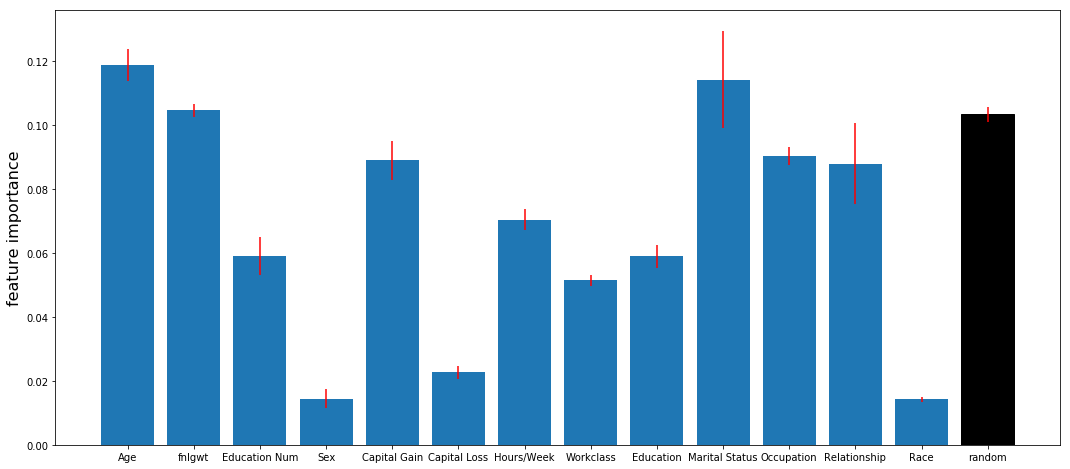

In [168]:
plt.figure(figsize=(18, 8))

pos = np.arange(len(imp_name))
bars = imp_name

barlist = plt.bar(pos, imp, yerr = std, ecolor = "red")
barlist[-1].set_color('black')
plt.xticks(pos, bars, fontsize = 10)

plt.ylabel("feature importance", fontsize = 16)

plt.savefig("SI_on_adult_data.png")

In [170]:
All = []

for rep in range(100):
    
    if rep % 5 == 0:
        print(rep)
    
    cls = RandomForestClassifier(n_estimators = 20)
    cls.fit(X, y)
    
    imp = UFI.cls(cls, X.values, y)
    
    imp_combined = [0] * (len(imp_name))
    
    imp_combined[:7] = imp[0:7]
    imp_combined[7]  = sum(imp[7:14])
    imp_combined[8] = sum(imp[14:30])
    imp_combined[9] = sum(imp[30:37])
    
    imp_combined[10] = sum(imp[37:50])
    imp_combined[11] = sum(imp[50:57])
    imp_combined[12] = sum(imp[57:62])
    imp_combined[13] = imp[62]
     
    All.append(imp_combined)

imp_oob = np.average(All, axis = 0)

std = np.std(All, axis = 0)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


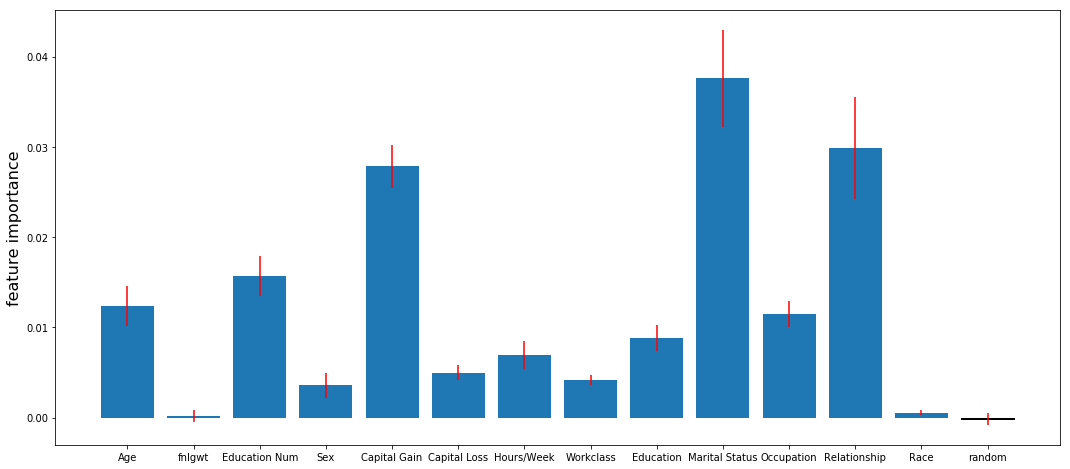

In [171]:
plt.figure(figsize=(18, 8))

pos = np.arange(len(imp_name))
bars = imp_name

barlist = plt.bar(pos, imp_oob, yerr = std, ecolor = "red")
barlist[-1].set_color('black')
plt.xticks(pos, bars, fontsize = 10)

plt.ylabel("feature importance", fontsize = 16)

plt.savefig("UFI_on_adult_data.png")